In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as stats
import numpy as np
    
%matplotlib inline

Multiple Regression Analysis

In [27]:
df = pd.read_csv("CarPrice_Assignment.csv")

We will remove independent variables with too many unique categories or have a high correlation with another dependent variable.

In [28]:
# We will remove independent variable with too many unique categories or have a high correlation with other dependent variable.

df = df.drop(columns=["car_ID","CarName","carlength","carwidth","highwaympg"])

#### One hot encoding to encode the categorical values

In [29]:
#Checking for the categorical data types

# we need to use one-hot encoding to code the categorical values into binary 
# and don't forget to drop the first values to prevent multicolnearity

dummy = pd.get_dummies(df.select_dtypes(include="object"), drop_first = "True")

In [30]:
# joint the data and the dummy together

df = pd.concat([df.select_dtypes(exclude="object"),dummy],axis = 1)

In [13]:
# we need to plot heat, so as to know the variables that are high correlated and drop them

df.select_dtypes(exclude="object").corr().style.background_gradient(cmap="coolwarm")

,symboling,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
symboling,1.000000,-0.531954,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,-0.079978,0.194311,-0.059866,0.664073,0.168845,0.435648,-0.378341,-0.298243,0.102839,-0.076381,0.212471,0.009347,-0.133979,-0.082855,0.037513,-0.013597,0.245950,-0.090188,-0.034161,-0.000238,0.065707,-0.047012,0.245950,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
wheelbase,-0.531954,1.000000,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,0.577816,-0.308346,0.257611,-0.447357,-0.008608,-0.386094,0.291086,0.210899,-0.460355,0.498830,-0.187790,-0.004156,0.399603,-0.204037,-0.183195,0.166152,-0.081174,0.261182,-0.309492,0.145842,-0.120709,0.037803,-0.081174,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129
carheight,-0.541038,0.589435,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,0.119336,-0.284631,0.087311,-0.552208,-0.072328,-0.477476,0.235863,0.459148,-0.100273,0.039814,-0.106234,-0.092628,0.319687,0.036260,-0.046670,-0.065063,-0.238720,0.152982,0.059696,-0.049777,-0.015076,-0.170181,-0.238720,-0.079418,-0.206225,0.284631,-0.101245,0.108685,-0.278615,-0.066778
curbweight,-0.227691,0.776386,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,0.835305,-0.217275,0.324902,-0.197379,0.098956,-0.287501,0.099425,0.164075,-0.666039,0.669987,0.050468,0.109243,0.250124,-0.413293,-0.080295,0.400878,-0.039196,0.264554,-0.576463,0.405490,-0.143903,0.187964,-0.039196,-0.577159,-0.040801,0.217275,0.034431,0.520220,-0.002434,0.024052
enginesize,-0.105790,0.569329,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,0.874145,-0.069594,0.108217,-0.020742,0.239363,-0.216805,0.088459,-0.027518,-0.518391,0.565509,0.196826,0.128248,0.016063,-0.363334,-0.016508,0.562403,-0.184762,0.144878,-0.631431,0.511783,-0.111081,0.335555,-0.184762,-0.442562,-0.166946,0.069594,0.049033,0.483520,0.004490,-0.013327
boreratio,-0.130051,0.488750,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,0.553173,-0.054451,0.212614,-0.119258,0.208089,-0.227032,0.030517,0.105719,-0.583087,0.574105,0.185042,0.158136,0.181729,-0.410383,0.326798,0.119509,0.000127,-0.007797,-0.164076,0.128365,-0.108774,0.054482,0.000127,-0.353342,0.000110,0.054451,0.070030,0.419335,-0.004213,0.025977
stroke,-0.008735,0.160959,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,0.079443,-0.241829,0.222982,0.011082,0.043215,0.052316,0.035630,-0.095084,0.124397,-0.022325,-0.138455,-0.032545,-0.084688,0.366084,-0.522808,-0.044813,-0.000187,0.176485,-0.111046,0.068388,-0.050450,-0.110878,-0.000187,-0.234866,-0.000162,0.241829,0.144263,-0.110280,0.251259,-0.005688
compressionratio,-0.178515,0.249786,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.067984,-0.984356,0.295541,-0.177888,0.029623,-0.202650,0.188286,0.016315,-0.062683,0.105185,-0.019762,-0.002519,0.219153,0.027545,-0.084328,-0.086649,-0.026436,0.173360,-0.012522,-0.065559,-0.011354,0.023986,-0.026436,-0.183384,-0.022838,0.984356,-0.055528,-0.311035,-0.153726,-0.016654
horsepower,0.070873,0.353294,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,0.808139,0.163926,0.241685,0.126947,0.194801,-0.053770,-0.024097,-0.063081,-0.544438,0.57

In [31]:
# drop the highly correlated values for the model

df = df.drop(columns=["compressionratio", "enginetype_rotor", "drivewheel_fwd", "fuelsystem_4bbl", "fuelsystem_idi"])

#### Building multiple regression model

#### Full Multiple Regression Model

#### Tests/Train SPlit

In [32]:
train_df = df.sample(frac=0.7, random_state =99) #random state is a seed value

test_df = df.drop(train_df.index)

In [33]:
train_df.shape

(144, 36)

In [34]:
test_df.shape

(61, 36)

#### Fitting the linear regression Model

In [35]:
y_train = train_df.price

x_train = stats.add_constant(train_df.drop(columns= ["price"]))

C:\Users\USER\anaconda4\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [36]:
car_model = stats.OLS(y_train, x_train)

result = car_model.fit()

In [37]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     48.60
Date:                Sat, 27 May 2023   Prob (F-statistic):           1.43e-51
Time:                        14:14:18   Log-Likelihood:                -1299.3
No. Observations:                 144   AIC:                             2669.
Df Residuals:                     109   BIC:                             2773.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -1.11e+

In [48]:
car_ssr = result.ssr

print("The sum of car_ssr is {:3f}".format(car_ssr))

The sum of car_ssr is 579728377.771962


We can use our test set to compare prediction with the observed values

In [50]:
y_test = test_df.price

test_df = stats.add_constant(test_df)

x_test = test_df[x_train.columns]

C:\Users\USER\anaconda4\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [52]:
test_pred = result.predict(x_test)

Text(0, 0.5, 'observed price')

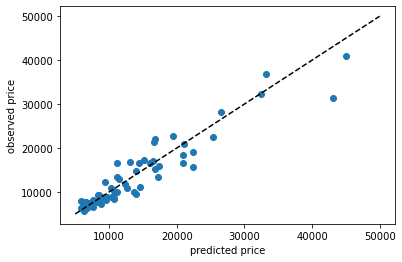

In [54]:
plt.scatter(test_pred, y_test)
plt.plot([5000,50000],[5000,50000], color = 'k', ls="--")
plt.xlabel("predicted price")
plt.ylabel("observed price")

In [16]:
intercept_ = result.params[0]
coeff_ = result.params[1]
salary_ssr = result.ssr

print("The intercept is {:3f}".format(intercept_))
print("The coeff_  of slope is {:3f}".format(coeff_))
print("The car_ssr is {:3f}".format(salary_ssr))

The intercept is -7969.444844
The coeff_  of slope is 167.599979
The car_ssr is 2319259109.318746


#### Ploting results of the regression

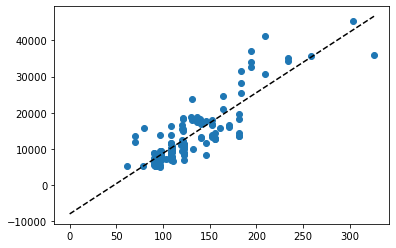

In [19]:
plt.scatter(train_df.enginesize, train_df.price, label="Observed")


# line of best fit

x_synthentic = np.linspace(0,train_df.enginesize.max(), 50)

y_pred_carprice = x_synthentic*coeff_ + intercept_

plt.plot(x_synthentic,y_pred_carprice, color="k", ls="--", label="Model" )

#### Apply the model to the test data

In [20]:
y_test = test_df.price

x_test = stats.add_constant(test_df.enginesize)

C:\Users\USER\anaconda4\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [21]:
# to create a set of test predictions based on our trained data, we do this

test_pred = result.predict(x_test)

#### Plotting our predictions

Text(0, 0.5, 'observed_price')

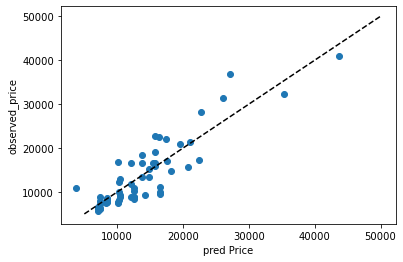

In [23]:
plt.scatter(test_pred, y_test)

# wee need a line to show when our prediction is correct

plt.plot([5000,50000],[5000,50000], color="k", ls="--")
plt.xlabel("pred Price")
plt.ylabel("observed_price")

We can see that our predictions are reasonably close to the actual values despite the model not being built on this data.